data: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews/code?resource=download

notebook: https://www.kaggle.com/code/ainurrohmanbwx/bi-gru-with-attention-on-sentiment-analysis

In [74]:
#imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import contractions
import nltk
from nltk.corpus import stopwords
import unicodedata
import string
from string import digits

#disable some annoying warnings
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'contractions'

In [4]:
import torch
device = torch.device("mps")

#sanity check for gpu
if torch.backends.mps.is_available(): 
     device = torch.device("mps")
     x = torch.ones(1, device=device)
     print (x)
else:
     print ("MPS device not found.")

tensor([1.], device='mps:0')


In [62]:
#read data
data = pd.read_csv('tripadvisor_hotel_reviews.csv', sep=',')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [47]:
data['Review'][109]

'close..but no sigar, stayed marqueen week, expensive, different experience staying typical hotel-chains, charming, variable service front-desk positive helpfull staff, room 211 spacius quite asked quite room got no view, window faced brick wall, probably better 3 floor.cleaning better hotel general soon general clean-up.close location space needle belltown,  '

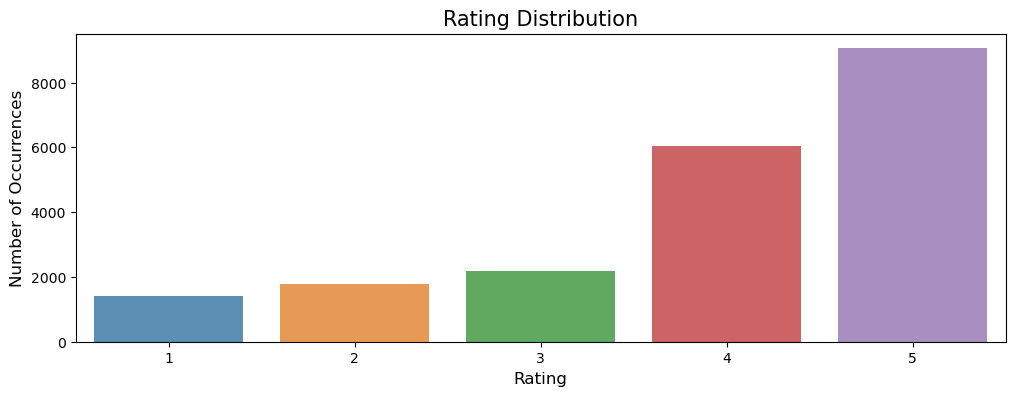

In [37]:
#plot label distribution
ratings = data['Rating'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ratings.index, y=ratings.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.title('Rating Distribution', fontsize=15)
plt.show()


In [63]:
#preprocessing
def stopwords_remove_en(text):
    en_stop = stopwords.words('english')
    words = [w for w in text.split() if w not in en_stop]
    return ' '.join(words)

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8','ignore')
    return text

def remove_punctuation_numbers(text):
    text = re.sub(" \d+", " ", text)
    
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)



In [64]:
def preprocess(text): 
    text = text.lower()
    text = stopwords_remove_en(text)
    text = remove_accented_chars(text)
    text = remove_punctuation_numbers(text)
    return text

In [66]:
cleaned_reviews = []
for review in data['Review']:
    print(review)
    print(preprocess(review))
    print("\n")
    cleaned_reviews.append(preprocess(review))

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  
nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products n

KeyboardInterrupt: 